In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from pandas import datetime
import statsmodels.api as sm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
import itertools

train=pd.read_csv("C:\\Users\\USER\\Desktop\\walmart4\\train.csv")
test=pd.read_csv("C:\\Users\\USER\\Desktop\\walmart4\\test.csv")
features=pd.read_csv("C:\\Users\\USER\\Desktop\\walmart4\\features.csv")
stores=pd.read_csv("C:\\Users\\USER\\Desktop\\walmart4\\stores.csv")

df2=pd.merge(train,features,on=['Store' ,'Date'],how='left')
df1=pd.merge(df2,stores,on=['Store'],how='left')
df1=df1.drop(["IsHoliday_x","Type","Size"],axis=1)

df1['MarkDown1'] = df1['MarkDown1'].fillna(0)
df1['MarkDown2'] = df1['MarkDown2'].fillna(0)
df1['MarkDown3'] = df1['MarkDown3'].fillna(0)
df1['MarkDown4'] = df1['MarkDown4'].fillna(0)
df1['MarkDown5'] = df1['MarkDown5'].fillna(0)
df1.set_index('Date', inplace=True)
df=df1[(df1["Store"]==1) & (df1["Dept"]==1)]
df["IsHoliday_y"]=pd.get_dummies(df["IsHoliday_y"],drop_first=True)
df.head(1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0


In [3]:
d_sales=train.groupby(['Date','Store'])['Weekly_Sales'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_sales.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
Zsales=d_sales.iloc[:,1:46]
Zsales.columns=b_names_t
 
Date=pd.DataFrame(d_sales['Date'])
Z_sales=pd.merge(Date,Zsales,left_index=True,right_index=True)
Z_sales['sales_sum'] = Z_sales.sum(axis=1)

Z_sales.tail(5)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,sales_sum
138,2012-09-28,1437059.26,1746470.56,389813.02,2027620.23,310141.68,1369131.46,525545.76,884724.41,516361.06,...,527953.14,398468.08,1495607.07,919595.44,1307928.01,505978.46,577792.32,355307.94,713173.95,43734899.40
139,2012-10-05,1670785.97,1998321.04,443557.65,2209835.43,343048.29,1518177.71,505830.56,976436.02,606755.30,...,546122.37,458479.01,1574408.67,1069112.00,1400160.95,593162.53,642614.89,337390.44,733455.07,47566639.31
140,2012-10-12,1573072.81,1900745.13,410804.39,2133026.07,325345.41,1459396.84,503463.93,927511.99,558464.80,...,521810.75,437320.66,1494417.07,982523.26,1409544.97,612379.90,619369.72,337796.13,734464.36,46128514.25
141,2012-10-19,1508068.77,1847990.41,424513.08,2097266.85,313358.15,1436883.99,516424.83,900309.75,542009.46,...,551969.10,428806.46,1577486.33,918170.50,1326197.24,541406.98,623919.23,323766.77,718125.53,45122410.57
142,2012-10-26,1493659.74,1834458.35,405432.70,2149594.46,319550.77,1431426.34,495543.28,891671.44,549731.49,...,534738.43,417290.38,1569502.00,921264.52,1316542.59,514756.08,587603.55,361067.07,760281.43,45544116.29


In [4]:
df.iloc[:,2:3]

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-09-28,18947.81
2012-10-05,21904.47
2012-10-12,22764.01


In [5]:
df.iloc[:,3:df.shape[1]]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,
2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0
2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1
2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0
2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0
2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,0
2012-10-05,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,223.181477,6.573,0
2012-10-12,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,223.381296,6.573,0


Text(0, 0.5, '$')

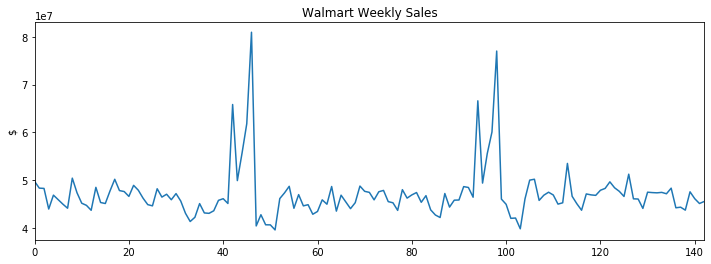

In [6]:
Z_sales.sales_sum.plot(figsize=(12,4))
plt.title('Walmart Weekly Sales')
plt.ylabel('$')


In [7]:
Z_sales_index=Z_sales.set_index('Date')
Zs_n=Z_sales_index.iloc[:,-1]
Zs_n.head(3)

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
Name: sales_sum, dtype: float64

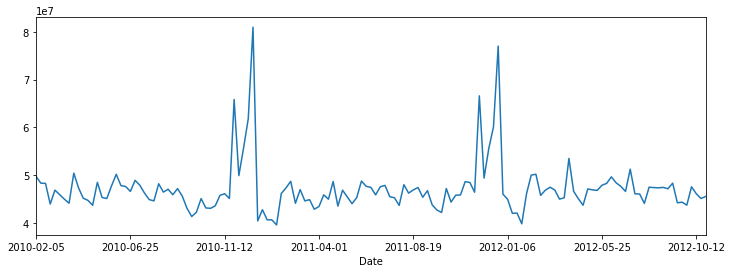

In [8]:
Zs_n.plot(figsize=(12,4))

In [9]:
data2=pd.DataFrame(Zs_n).reset_index()

data2.head(4)


,Date,sales_sum
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13


In [10]:
data2.dtypes

Date          object
sales_sum    float64
dtype: object

In [11]:
model = sm.OLS(df.iloc[:,2:3].values,
               df.iloc[:,3:df.shape[1]]
              )
regr = model.fit()
RSS = ((regr.predict(df.iloc[:,3:df.shape[1]])-df["Weekly_Sales"]) ** 2).sum()
RSS

10392202749.470898

In [12]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              97.11
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                    4.29e-56
Time:                        20:48:41   Log-Likelihood:                         -1497.2
No. Observations:                 143   AIC:                                      3014.
Df Residuals:                     133   BIC:                                      3044.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature   -361.5683     57.841     -6.251      0.000    -475.975    -247.161
Fuel_Price    1140.2351   2324.183      0.491      0.625   -3456.908    5737.378
MarkDown1        0.1094      0.287      0.382      0.703      -0.458       0.677
MarkDown2       -0.1953      0.183     -1.066      0.288      -0.558       0.167
MarkDown3       -0.1143      0.168     -0.680      0.498      -0.447       0.218
MarkDown4       -0.0158      0.323     -0.049      0.961      -0.655       0.624
MarkDown5       -0.3806      0.334     -1.141      0.256      -1.040       0.279
CPI            155.4332    102.417      1.518      0.131     -47.143     358.009
Unemployment  1380.4033   2217.052      0.623      0.535   -3004.840    5765.647
IsHoliday_y    986.1729   3232.912      0.305      0.761   -5408.401    7380.747
==============================================================================
Omnibus:                       64.917   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.520
Skew:                           1.832   Prob(JB):                     1.91e-41
Kurtosis:                       7.249   Cond. No.                     3.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
d_temp=features.groupby(['Date','Store'])['Temperature'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_temp.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
Ztemp=d_temp.iloc[:,1:46]
Ztemp.columns=b_names_t
 
Date=pd.DataFrame(d_temp['Date'])
Z_temp=pd.merge(Date,Ztemp,left_index=True,right_index=True)
Z_temp['T_mean'] = Z_temp.mean(axis=1)
Temp_mean=Z_temp.iloc[:,[0,-1]] 
Z_temp.head(5)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,T_mean
0,2010-02-05,42.31,40.19,45.71,43.76,39.70,40.43,10.53,34.14,38.01,...,45.97,49.47,44.30,14.48,30.27,54.34,47.31,31.53,27.31,34.037333
1,2010-02-12,38.51,38.49,47.93,28.84,39.81,40.57,25.90,33.34,37.08,...,46.11,47.87,44.58,20.84,23.04,49.96,47.99,33.16,27.73,34.151333
2,2010-02-19,39.93,39.69,47.07,36.45,41.14,43.58,27.28,39.10,43.06,...,45.66,54.83,43.96,27.84,24.13,58.22,48.77,35.70,31.27,37.719778
3,2010-02-26,46.63,46.10,52.05,41.36,46.70,47.10,24.91,37.91,43.83,...,50.87,50.23,49.79,33.32,21.84,52.77,48.77,29.98,34.89,39.243556
4,2010-03-05,46.50,47.17,53.04,43.49,48.89,49.63,35.86,45.64,48.43,...,51.33,53.77,50.93,34.78,32.49,55.92,52.89,40.65,37.13,42.917333


In [14]:
Temp_mean.head(4)


,Date,T_mean
0,2010-02-05,34.037333
1,2010-02-12,34.151333
2,2010-02-19,37.719778
3,2010-02-26,39.243556


In [15]:
d_fuel=features.groupby(['Date','Store'])['Fuel_Price'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_fuel.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
Zfuel=d_fuel.iloc[:,1:46]
Zfuel.columns=b_names_t
 
Date=pd.DataFrame(d_fuel['Date'])
Z_fuel=pd.merge(Date,Zfuel,left_index=True,right_index=True)
Z_fuel['fuel_mean'] = Z_fuel.mean(axis=1)
fuel_mean=Z_fuel.iloc[:,[0,-1]] 
Z_fuel.head(5)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,fuel_mean
0,2010-02-05,2.572,2.572,2.572,2.598,2.572,2.572,2.580,2.572,2.572,...,2.572,2.962,2.572,2.788,2.580,2.962,2.572,2.666,2.784,2.717844
1,2010-02-12,2.548,2.548,2.548,2.573,2.548,2.548,2.572,2.548,2.548,...,2.548,2.946,2.548,2.771,2.572,2.828,2.548,2.671,2.773,2.694022
2,2010-02-19,2.514,2.514,2.514,2.540,2.514,2.514,2.550,2.514,2.514,...,2.514,2.915,2.514,2.747,2.550,2.915,2.514,2.654,2.745,2.672067
3,2010-02-26,2.561,2.561,2.561,2.590,2.561,2.561,2.586,2.561,2.561,...,2.561,2.825,2.561,2.753,2.586,2.825,2.561,2.667,2.754,2.683933
4,2010-03-05,2.625,2.625,2.625,2.654,2.625,2.625,2.620,2.625,2.625,...,2.625,2.987,2.625,2.766,2.620,2.877,2.625,2.681,2.777,2.731200


In [16]:
fuel_mean.head(4)

,Date,fuel_mean
0,2010-02-05,2.717844
1,2010-02-12,2.694022
2,2010-02-19,2.672067
3,2010-02-26,2.683933


In [17]:
d_cpi=features.groupby(['Date','Store'])['CPI'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_cpi.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
Zcpi=d_cpi.iloc[:,1:46]
Zcpi.columns=b_names_t
 
Date=pd.DataFrame(d_cpi['Date'])
Z_cpi=pd.merge(Date,Zcpi,left_index=True,right_index=True)
Z_cpi['cpi_mean'] = Z_cpi.mean(axis=1)
cpi_mean=Z_cpi.iloc[:,[0,-1]] 
Z_cpi.head(5)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,cpi_mean
0,2010-02-05,211.096358,210.752605,214.424881,126.442065,211.653972,212.622352,189.381697,214.471451,214.655459,...,209.852966,126.442065,209.852966,131.527903,189.381697,126.442065,203.064274,126.442065,181.871190,167.730885
1,2010-02-12,211.242170,210.897994,214.574792,126.496258,211.800470,212.770042,189.464273,214.621419,214.805653,...,209.997021,126.496258,209.997021,131.586613,189.464273,126.496258,203.201097,126.496258,181.982317,167.825608
2,2010-02-19,211.289143,210.945160,214.619887,126.526286,211.847128,212.816155,189.534100,214.666488,214.850618,...,210.045102,126.526286,210.045102,131.637000,189.534100,126.526286,203.247980,126.526286,182.034782,167.871686
3,2010-02-26,211.319643,210.975957,214.647513,126.552286,211.877147,212.845337,189.601802,214.694073,214.878045,...,210.077188,126.552286,210.077188,131.686000,189.601802,126.552286,203.279872,126.552286,182.077469,167.909657
4,2010-03-05,211.350143,211.006754,214.675139,126.578286,211.907165,212.874519,189.669505,214.721659,214.905472,...,210.109275,126.578286,210.109275,131.735000,189.669505,126.578286,203.311765,126.578286,182.120157,167.947628


In [18]:
cpi_mean.head(4)

,Date,cpi_mean
0,2010-02-05,167.730885
1,2010-02-12,167.825608
2,2010-02-19,167.871686
3,2010-02-26,167.909657


In [19]:
d_unemp=features.groupby(['Date','Store'])['Unemployment'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_unemp.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
Zunemp=d_unemp.iloc[:,1:46]
Zunemp.columns=b_names_t
 
Date=pd.DataFrame(d_unemp['Date'])
Z_unemp=pd.merge(Date,Zunemp,left_index=True,right_index=True)
Z_unemp['unemp_mean'] = Z_unemp.mean(axis=1)
unemp_mean=Z_unemp.iloc[:,[0,-1]] 
Z_unemp.head(3)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,unemp_mean
0,2010-02-05,8.106,8.324,7.368,8.623,6.566,7.259,9.014,6.299,6.415,...,8.554,13.975,8.554,5.892,7.541,9.765,9.521,8.119,8.992,8.619311
1,2010-02-12,8.106,8.324,7.368,8.623,6.566,7.259,9.014,6.299,6.415,...,8.554,13.975,8.554,5.892,7.541,9.765,9.521,8.119,8.992,8.619311
2,2010-02-19,8.106,8.324,7.368,8.623,6.566,7.259,9.014,6.299,6.415,...,8.554,13.975,8.554,5.892,7.541,9.765,9.521,8.119,8.992,8.619311


In [20]:
unemp_mean.head(3)

,Date,unemp_mean
0,2010-02-05,8.619311
1,2010-02-12,8.619311
2,2010-02-19,8.619311


In [21]:
d_Mark1=features.groupby(['Date','Store'])['MarkDown1'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_Mark1.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
ZMark1=d_Mark1.iloc[:,1:46]
ZMark1.columns=b_names_t
 
Date=pd.DataFrame(d_Mark1['Date'])
Z_Mark1=pd.merge(Date,ZMark1,left_index=True,right_index=True)
Z_Mark1['Mark1_mean'] = Z_Mark1.mean(axis=1)
Mark1_mean=Z_Mark1.iloc[:,[0,-1]] 
Z_Mark1.tail(3)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,Mark1_mean
179,2013-07-12,6089.94,7527.10,1362.23,6501.43,1621.68,13456.91,918.12,4018.39,2239.81,...,75.65,109.65,9353.87,2354.57,3566.03,51.96,142.96,182.25,3789.94,3962.768444
180,2013-07-19,3117.04,3313.12,718.43,4191.78,744.92,2124.10,460.90,1034.72,1040.56,...,100.53,108.80,6732.22,4340.79,3320.48,211.63,112.12,118.82,2961.49,2607.699333
181,2013-07-26,332.17,1966.46,586.26,1577.60,131.42,543.69,180.87,675.56,52.43,...,178.00,73.70,12682.46,145.10,497.67,0.00,43.37,134.31,212.02,876.371556


In [22]:
Mark1_mean.tail(3)

,Date,Mark1_mean
179,2013-07-12,3962.768444
180,2013-07-19,2607.699333
181,2013-07-26,876.371556


In [23]:
d_Mark2=features.groupby(['Date','Store'])['MarkDown2'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_Mark2.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
ZMark2=d_Mark2.iloc[:,1:46]
ZMark2.columns=b_names_t
 
Date=pd.DataFrame(d_Mark2['Date'])
Z_Mark2=pd.merge(Date,ZMark2,left_index=True,right_index=True)
Z_Mark2['Mark2_mean'] = Z_Mark2.mean(axis=1)
Mark2_mean=Z_Mark2.iloc[:,[0,-1]] 
Z_Mark2.tail(3)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,Mark2_mean
179,2013-07-12,1362.42,1244.78,645.99,1464.81,62.35,1783.40,732.41,893.36,594.63,...,17.79,0.0,2028.90,1440.95,1735.73,0.0,0.0,0.0,1827.31,1063.851333
180,2013-07-19,1060.39,723.52,228.54,440.36,64.71,693.74,250.72,486.84,188.09,...,11.86,0.0,1628.15,1607.47,1520.39,0.0,0.0,0.0,1047.07,781.046222
181,2013-07-26,673.19,609.55,256.64,687.89,35.39,798.02,54.56,740.04,258.14,...,11.86,0.0,1094.97,1149.84,1454.29,0.0,0.0,0.0,851.73,671.725111


In [24]:
Mark2_mean.tail(3)

,Date,Mark2_mean
179,2013-07-12,1063.851333
180,2013-07-19,781.046222
181,2013-07-26,671.725111


In [25]:
d_Mark3=features.groupby(['Date','Store'])['MarkDown3'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_Mark3.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
ZMark3=d_Mark1.iloc[:,1:46]
ZMark3.columns=b_names_t
 
Date=pd.DataFrame(d_Mark1['Date'])
Z_Mark3=pd.merge(Date,ZMark3,left_index=True,right_index=True)
Z_Mark3['Mark3_mean'] = Z_Mark3.mean(axis=1)
Mark3_mean=Z_Mark3.iloc[:,[0,-1]] 
Z_Mark3.tail(3)



,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,Mark3_mean
179,2013-07-12,6089.94,7527.10,1362.23,6501.43,1621.68,13456.91,918.12,4018.39,2239.81,...,75.65,109.65,9353.87,2354.57,3566.03,51.96,142.96,182.25,3789.94,3962.768444
180,2013-07-19,3117.04,3313.12,718.43,4191.78,744.92,2124.10,460.90,1034.72,1040.56,...,100.53,108.80,6732.22,4340.79,3320.48,211.63,112.12,118.82,2961.49,2607.699333
181,2013-07-26,332.17,1966.46,586.26,1577.60,131.42,543.69,180.87,675.56,52.43,...,178.00,73.70,12682.46,145.10,497.67,0.00,43.37,134.31,212.02,876.371556


In [26]:
Mark3_mean.tail(3)

,Date,Mark3_mean
179,2013-07-12,3962.768444
180,2013-07-19,2607.699333
181,2013-07-26,876.371556


In [27]:
d_Mark4=features.groupby(['Date','Store'])['MarkDown4'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_Mark4.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
ZMark4=d_Mark1.iloc[:,1:46]
ZMark4.columns=b_names_t
 
Date=pd.DataFrame(d_Mark4['Date'])
Z_Mark4=pd.merge(Date,ZMark4,left_index=True,right_index=True)
Z_Mark4['Mark4_mean'] = Z_Mark4.mean(axis=1)
Mark4_mean=Z_Mark4.iloc[:,[0,-1]] 
Z_Mark4.tail(3)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,Mark4_mean
179,2013-07-12,6089.94,7527.10,1362.23,6501.43,1621.68,13456.91,918.12,4018.39,2239.81,...,75.65,109.65,9353.87,2354.57,3566.03,51.96,142.96,182.25,3789.94,3962.768444
180,2013-07-19,3117.04,3313.12,718.43,4191.78,744.92,2124.10,460.90,1034.72,1040.56,...,100.53,108.80,6732.22,4340.79,3320.48,211.63,112.12,118.82,2961.49,2607.699333
181,2013-07-26,332.17,1966.46,586.26,1577.60,131.42,543.69,180.87,675.56,52.43,...,178.00,73.70,12682.46,145.10,497.67,0.00,43.37,134.31,212.02,876.371556


In [28]:
Mark4_mean.tail(3)

,Date,Mark4_mean
179,2013-07-12,3962.768444
180,2013-07-19,2607.699333
181,2013-07-26,876.371556


In [29]:
d_Mark5=features.groupby(['Date','Store'])['MarkDown5'].aggregate('sum').unstack().rename_axis(columns=None).reset_index()

#rename the column
num_col_name=d_Mark5.columns[1:46]
b_names_t=[]
for name in num_col_name:
    b_names_t.append('Store'+str(name))
ZMark5=d_Mark5.iloc[:,1:46]
ZMark5.columns=b_names_t
 
Date=pd.DataFrame(d_Mark5['Date'])
Z_Mark5=pd.merge(Date,ZMark5,left_index=True,right_index=True)
Z_Mark5['Mark5_mean'] = Z_Mark5.mean(axis=1)
Mark5_mean=Z_Mark5.iloc[:,[0,-1]] 
Z_Mark5.tail(3)


,Date,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44,Store45,Mark5_mean
179,2013-07-12,2651.05,3881.66,2033.65,3868.60,1684.25,6330.81,1397.18,3186.00,1613.78,...,1264.00,845.94,4778.92,1281.55,2903.13,1346.73,7035.07,1842.48,2150.36,2891.560222
180,2013-07-19,5381.72,2471.69,627.68,2252.18,2151.64,3867.01,778.74,7118.46,1507.30,...,1346.17,1997.93,4250.58,2576.36,5284.27,478.31,722.50,514.08,1059.46,1893.073333
181,2013-07-26,1245.20,2416.20,1152.08,1433.77,948.51,2648.37,877.99,2343.11,1265.60,...,779.32,423.05,2779.41,1116.30,2418.00,756.79,531.35,199.75,1864.57,1623.047111


In [30]:
Mark5_mean.tail(3)

,Date,Mark5_mean
179,2013-07-12,2891.560222
180,2013-07-19,1893.073333
181,2013-07-26,1623.047111


In [31]:
fuel_mean['Date']=pd.to_datetime(fuel_mean['Date'])
Temp_mean['Date']=pd.to_datetime(Temp_mean['Date'])
cpi_mean['Date']=pd.to_datetime(cpi_mean['Date'])
unemp_mean['Date']=pd.to_datetime(unemp_mean['Date'])
Mark1_mean['Date']=pd.to_datetime(Mark1_mean['Date'])
Mark2_mean['Date']=pd.to_datetime(Mark2_mean['Date'])
Mark3_mean['Date']=pd.to_datetime(Mark3_mean['Date'])
Mark4_mean['Date']=pd.to_datetime(Mark4_mean['Date'])
Mark5_mean['Date']=pd.to_datetime(Mark5_mean['Date'])
data2['Date']=pd.to_datetime(data2['Date'])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [32]:
fuel_mean.dtypes

Date         datetime64[ns]
fuel_mean           float64
dtype: object

In [33]:

Data_test=pd.merge(data2,Temp_mean,on=['Date'],how='right')
Data_test1=pd.merge(Data_test,fuel_mean,on=['Date'],how='right')
Data_test2=pd.merge(Data_test1,cpi_mean,on=['Date'],how='right')
Data_test3=pd.merge(Data_test2,unemp_mean,on=['Date'],how='right')
Data_test4=pd.merge(Data_test3,Mark1_mean,on=['Date'],how='right')
Data_test5=pd.merge(Data_test4,Mark2_mean,on=['Date'],how='right')
Data_test6=pd.merge(Data_test5,Mark3_mean,on=['Date'],how='right')
Data_test7=pd.merge(Data_test6,Mark4_mean,on=['Date'],how='right')
Data_test8=pd.merge(Data_test7,Mark5_mean,on=['Date'],how='right')



Data_index=Data_test8.set_index("Date")
Data_index.tail(5)
 

,sales_sum,T_mean,fuel_mean,cpi_mean,unemp_mean,Mark1_mean,Mark2_mean,Mark3_mean,Mark4_mean,Mark5_mean
Date,,,,,,,,,,
2013-06-28,NaN,79.871111,3.629400,0.0,0.0,4905.673333,630.564444,4905.673333,4905.673333,3771.952889
2013-07-05,NaN,79.655778,3.583533,0.0,0.0,8197.936444,1802.939333,8197.936444,8197.936444,2389.641333
2013-07-12,NaN,80.798667,3.568111,0.0,0.0,3962.768444,1063.851333,3962.768444,3962.768444,2891.560222
2013-07-19,NaN,79.268667,3.683444,0.0,0.0,2607.699333,781.046222,2607.699333,2607.699333,1893.073333
2013-07-26,NaN,78.037333,3.734444,0.0,0.0,876.371556,671.725111,876.371556,876.371556,1623.047111


In [34]:
data2.dtypes

Date         datetime64[ns]
sales_sum           float64
dtype: object

In [35]:
#X = Data_index.iloc[:143,0]
#y = Data_index.iloc[:143,1:5]
y = Data_index[["sales_sum"]].dropna()
X = Data_index[["fuel_mean","T_mean","cpi_mean","unemp_mean",'Mark1_mean','Mark2_mean','Mark3_mean','Mark4_mean','Mark5_mean']].iloc[:143,].dropna()
X


,fuel_mean,T_mean,cpi_mean,unemp_mean,Mark1_mean,Mark2_mean,Mark3_mean,Mark4_mean,Mark5_mean
Date,,,,,,,,,
2010-02-05,2.717844,34.037333,167.730885,8.619311,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-12,2.694022,34.151333,167.825608,8.619311,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-19,2.672067,37.719778,167.871686,8.619311,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-26,2.683933,39.243556,167.909657,8.619311,0.000000,0.000000,0.000000,0.000000,0.000000
2010-03-05,2.731200,42.917333,167.947628,8.619311,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2012-09-28,3.854578,68.754444,176.373588,7.237333,4639.613556,17.927333,4639.613556,4639.613556,4068.400222
2012-10-05,3.845222,65.973111,176.505052,6.953711,4765.206889,0.000000,4765.206889,4765.206889,3480.252444
2012-10-12,3.896733,58.342667,176.636515,6.953711,1845.466000,0.000000,1845.466000,1845.466000,5339.082667


In [36]:
y['sales_sum']

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: sales_sum, Length: 143, dtype: float64

In [37]:
y.head(4)

,sales_sum
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13


In [38]:
lin_reg = sm.OLS(y.values,X).fit()
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1568.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                   1.09e-126
Time:                        20:48:44   Log-Likelihood:                         -2415.6
No. Observations:                 143   AIC:                                      4845.
Df Residuals:                     136   BIC:                                      4866.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fuel_mean  -1.541e+06   1.84e+06     -0.839      0.403   -5.17e+06    2.09e+06
T_mean     -5.825e+04   3.23e+04     -1.804      0.073   -1.22e+05    5606.532
cpi_mean    2.675e+05   1.07e+05      2.494      0.014    5.54e+04     4.8e+05
unemp_mean  1.199e+06   1.59e+06      0.753      0.453   -1.95e+06    4.35e+06
Mark1_mean   -14.7527     43.954     -0.336      0.738    -101.675      72.169
Mark2_mean  -156.1812    121.455     -1.286      0.201    -396.365      84.003
Mark3_mean   -14.7527     43.954     -0.336      0.738    -101.675      72.169
Mark4_mean   -14.7527     43.954     -0.336      0.738    -101.675      72.169
Mark5_mean   365.2685    280.399      1.303      0.195    -189.237     919.774
==============================================================================
Omnibus:                      130.049   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1707.360
Skew:                           3.266   Prob(JB):                         0.00
Kurtosis:                      18.616   Cond. No.                     6.34e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
x1=X.drop(['fuel_mean','unemp_mean','Mark1_mean','Mark2_mean','Mark3_mean','Mark4_mean','Mark5_mean'],axis=1)

In [40]:
x1.head(3)

,T_mean,cpi_mean
Date,,
2010-02-05,34.037333,167.730885
2010-02-12,34.151333,167.825608
2010-02-19,37.719778,167.871686


In [41]:
exog1=x1
exog1.head(4)

,T_mean,cpi_mean
Date,,
2010-02-05,34.037333,167.730885
2010-02-12,34.151333,167.825608
2010-02-19,37.719778,167.871686
2010-02-26,39.243556,167.909657


In [42]:
model=sm.tsa.statespace.SARIMAX(y['sales_sum'],order=(1, 0, 1),seasonal_order=(1,0,1,28),exog=exog1)
results=model.fit()
results.summary()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          sales_sum   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 28)   Log Likelihood               -2409.907
Date:                            Wed, 17 Jun 2020   AIC                           4833.815
Time:                                    20:48:47   BIC                           4854.555
Sample:                                02-05-2010   HQIC                          4842.243
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T_mean     -6.374e+04   9.17e+04     -0.695      0.487   -2.43e+05    1.16e+05
cpi_mean    2.971e+05   2.63e+04     11.297      0.000    2.46e+05    3.49e+05
ar.L1          0.5337      0.248      2.153      0.031       0.048       1.020
ma.L1         -0.2332      0.277     -0.842      0.400      -0.776       0.309
ar.S.L28       0.7645      1.506      0.507      0.612      -2.188       3.717
ma.S.L28      -0.6784      1.765     -0.384      0.701      -4.137       2.780
sigma2       2.64e+13      0.000   6.47e+16      0.000    2.64e+13    2.64e+13
===================================================================================
Ljung-Box (Q):                       42.35   Jarque-Bera (JB):               990.44
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             2.27
Prob(H) (two-sided):                  0.08   Kurtosis:                        15.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.98e+32. Standard errors may be unstable.
"""

In [43]:
pred_Y=results.forecast(steps=90,exog=pd.DataFrame(exog1[0:90]))
d_smx=pd.DataFrame(round(pred_Y.reset_index(),0)) 
d_smx.columns=["Date","Predicted"]
d_smx["Date"]=pd.to_datetime(d_smx["Date"])
d_smx.set_index('Date',inplace=True) 
d_smx.head(10)
 


,Predicted
Date,
2012-11-02,46056417.0
2012-11-09,46301729.0
2012-11-16,46787996.0
2012-11-23,46783606.0
2012-11-30,46982627.0
2012-12-07,46725016.0
2012-12-14,46562194.0
2012-12-21,47869569.0
2012-12-28,46412107.0


In [44]:
pd.DataFrame(y['sales_sum'])

,sales_sum
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


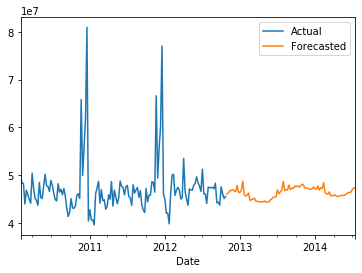

In [45]:
dd=pd.concat([y['sales_sum'], d_smx]).rename(columns={0:'Actual','Predicted':'Forecasted'})
dd.plot()

In [46]:
dd.tail(3)

,Actual,Forecasted
Date,,
2014-07-04,NaN,47092498.0
2014-07-11,NaN,47299878.0
2014-07-18,NaN,47450467.0


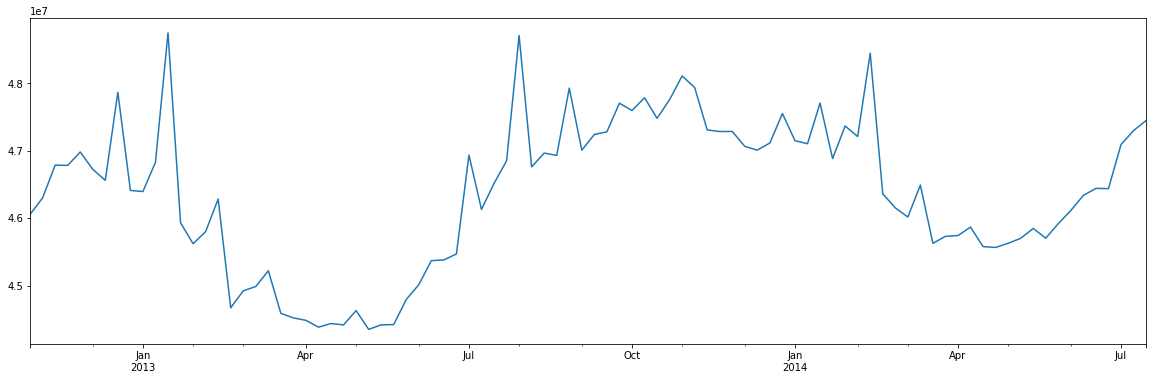

In [47]:
pred_Y.plot(figsize=(20, 6))

In [48]:
mm=pd.concat([y['sales_sum'], exog1]).rename(columns={0:'sales_sum'})
mm.tail(3)

,sales_sum,T_mean,cpi_mean
Date,,,
2012-10-12,NaN,58.342667,176.636515
2012-10-19,NaN,60.705333,176.652613
2012-10-26,NaN,61.051111,176.649482


In [49]:
data_sales=y.iloc[:,-1] 
data_sales=data_sales.reset_index() 
data_sales.head(5)

,Date,sales_sum
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [50]:
exog2=exog1.reset_index()
exog2.head(2)

,Date,T_mean,cpi_mean
0,2010-02-05,34.037333,167.730885
1,2010-02-12,34.151333,167.825608


In [51]:
Data_t1=pd.merge(data_sales,exog2,on=['Date'],how='right')
Data_t1.head(3)

,Date,sales_sum,T_mean,cpi_mean
0,2010-02-05,49750740.50,34.037333,167.730885
1,2010-02-12,48336677.63,34.151333,167.825608
2,2010-02-19,48276993.78,37.719778,167.871686


In [52]:
predicted_sales=pred_Y.reset_index()


In [53]:
forecast2=pd.DataFrame(np.concatenate([data_sales,predicted_sales]))
forecast2.columns=["Date","Sales"] 
f_indx2=forecast2.set_index(['Date']) 
f_indx2 

,Sales
Date,
2010-02-05,4.97507e+07
2010-02-12,4.83367e+07
2010-02-19,4.8277e+07
2010-02-26,4.39686e+07
2010-03-05,4.68715e+07
...,...
2014-06-20,4.64425e+07
2014-06-27,4.64389e+07
2014-07-04,4.70925e+07


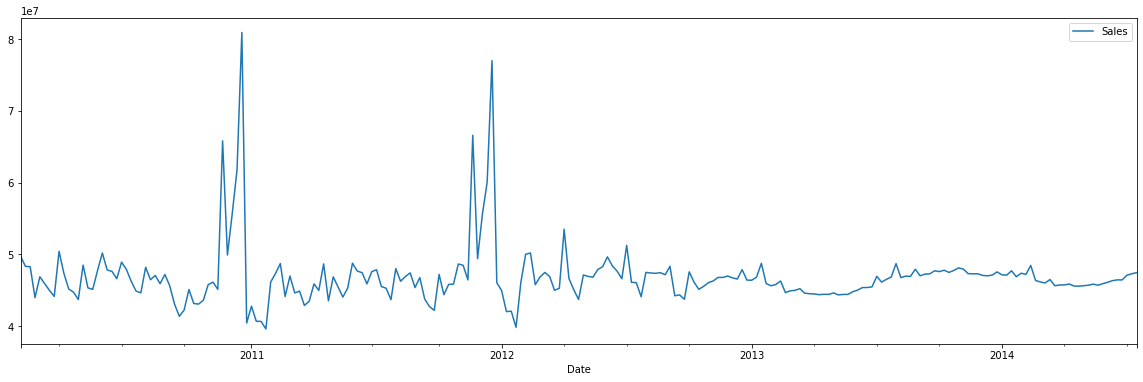

In [54]:
f_indx2.plot(figsize=(20, 6))
 

In [55]:
z=y
z.head(3)

,sales_sum
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78


In [56]:
z['forecast']=results.predict(start=125,end=143,exog=pd.DataFrame(exog1[:1]))


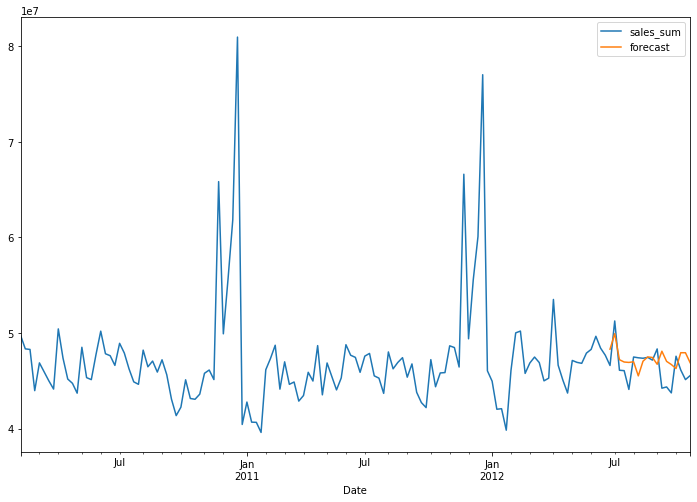

In [57]:
z[['sales_sum','forecast']].plot(figsize=(12,8))

In [58]:
exog1[:1]

,T_mean,cpi_mean
Date,,
2010-02-05,34.037333,167.730885


# LSTM MODEL

In [59]:
from keras.layers import Dropout

Using TensorFlow backend.


In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [61]:
#fix random seed for reproducibility
np.random.seed(7)


In [62]:
y.head(3)

,sales_sum,forecast
Date,,
2010-02-05,49750740.50,NaN
2010-02-12,48336677.63,NaN
2010-02-19,48276993.78,NaN


In [63]:
dw=y.reset_index() 
dw.head(2)

,Date,sales_sum,forecast
0,2010-02-05,49750740.50,NaN
1,2010-02-12,48336677.63,NaN


In [64]:
dz=data_sales
dz.head(3)

,Date,sales_sum
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78


In [65]:
dataset = dz.iloc[:, 1:2].values
dataset

array([[49750740.5       ],
       [48336677.63      ],
       [48276993.77999999],
       [43968571.13      ],
       [46871470.3       ],
       [45925396.51      ],
       [44988974.64000001],
       [44133961.05      ],
       [50423831.26      ],
       [47365290.44      ],
       [45183667.08000001],
       [44734452.56      ],
       [43705126.71      ],
       [48503243.52      ],
       [45330080.20000001],
       [45120108.05999999],
       [47757502.56      ],
       [50188543.12      ],
       [47826546.72000001],
       [47622046.23      ],
       [46609036.29000001],
       [48917484.49999999],
       [47899529.37      ],
       [46243899.58000001],
       [44888849.10999999],
       [44630363.42000001],
       [48204999.12      ],
       [46464418.41      ],
       [47060952.92000001],
       [45909740.44      ],
       [47194257.61      ],
       [45634397.84      ],
       [43080726.50999999],
       [41358514.41      ],
       [42239875.87      ],
       [45102974.23 

In [66]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_sc = sc.fit_transform(dataset)
dataset1=dataset_sc

In [67]:
# convert an array of values into a dataset matrix
def create_dataset(dataset1, look_back=1):
    dataW, dataY = [], []
    for i in range(len(dataset1)-look_back-1):
        a = dataset1[i:(i+look_back), 0]
        dataW.append(a)
        dataY.append(dataset1[i + look_back, 0])
    return np.array(dataW), np.array(dataY)

In [68]:
# split into train and test sets
train_size = int(len(dataset1) * 0.67)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))


95 48


In [69]:
# reshape into W=t and Y=t+1
look_back = 3
trainW, trainY = create_dataset(train, look_back)
testW, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainW = np.reshape(trainW, (trainW.shape[0], trainW.shape[1], 1))
testW = np.reshape(testW, (testW.shape[0], testW.shape[1], 1))



In [70]:
print(trainW.shape),print(trainY.shape)

(91, 3, 1)
(91,)


(None, None)

In [71]:
 #create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainW, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0177
Epoch 2/100
 - 0s - loss: 0.0143
Epoch 3/100
 - 0s - loss: 0.0210
Epoch 4/100
 - 0s - loss: 0.0140
Epoch 5/100
 - 0s - loss: 0.0152
Epoch 6/100
 - 1s - loss: 0.0150
Epoch 7/100
 - 1s - loss: 0.0152
Epoch 8/100
 - 0s - loss: 0.0169
Epoch 9/100
 - 0s - loss: 0.0136
Epoch 10/100
 - 0s - loss: 0.0166
Epoch 11/100
 - 0s - loss: 0.0180
Epoch 12/100
 - 0s - loss: 0.0134
Epoch 13/100
 - 0s - loss: 0.0141
Epoch 14/100
 - 0s - loss: 0.0204
Epoch 15/100
 - 0s - loss: 0.0132
Epoch 16/100
 - 0s - loss: 0.0155
Epoch 17/100
 - 0s - loss: 0.0134
Epoch 18/100
 - 0s - loss: 0.0148
Epoch 19/100
 - 1s - loss: 0.0138
Epoch 20/100
 - 0s - loss: 0.0140
Epoch 21/100
 - 1s - loss: 0.0156
Epoch 22/100
 - 1s - loss: 0.0145
Epoch 23/100
 - 1s - loss: 0.0162
Epoch 24/100
 - 1s - loss: 0.0124
Epoch 25/100
 - 1s - loss: 0.0130
Epoch 26/100
 - 0s - loss: 0.0131
Epoch 27/100
 - 0s - loss: 0.0150
Epoch 28/100
 - 1s - loss: 0.0140
Epoch 29/100
 - 1s - loss: 0.0151
Epoch 30/100
 - 1s - lo

In [72]:

# make predictions
trainPredict = model.predict(trainW)
testPredict = model.predict(testW)



In [73]:
trainW.shape

(91, 3, 1)

In [74]:
trainPredict.shape,trainY.shape

((91, 1), (91,))

In [75]:
trainPredict = sc.inverse_transform(trainPredict)
trainY = sc.inverse_transform([trainY])
testPredict = sc.inverse_transform(testPredict)
testY = sc.inverse_transform([testY])



In [76]:
testPredict.shape,testY.shape

((44, 1), (1, 44))

In [77]:
import math
from sklearn.metrics import mean_squared_error


In [78]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4698161.05 RMSE
Test Score: 4764144.84 RMSE


In [79]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [80]:
#shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[99:143, :] = testPredict

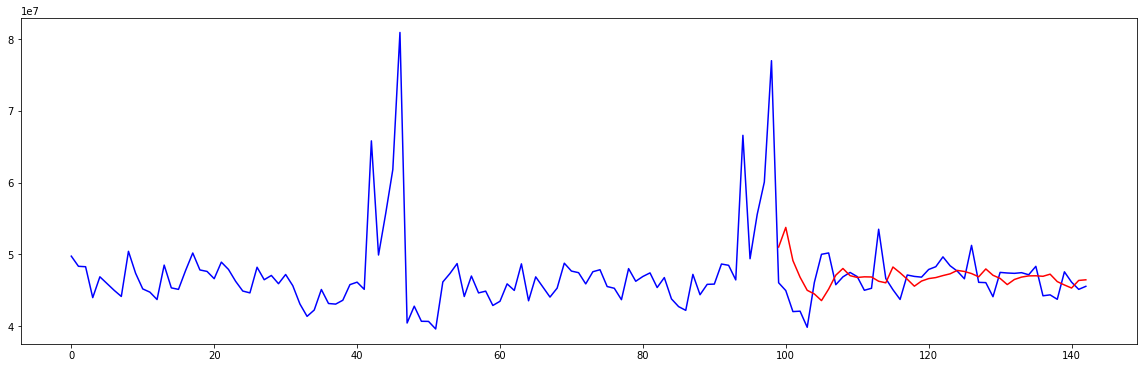

In [81]:
# plot baseline and predictions
plt.figure(figsize=(20,6))
plt.plot(sc.inverse_transform(dataset1),color='blue')
# plt.plot(trainPredict,color='green')
plt.plot(testPredictPlot,color='red')


## 2nd process

In [82]:
datas1=data_sales
datas1.head(3)


,Date,sales_sum
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78


In [83]:
datas1.Date=pd.to_datetime(datas1.Date)
datas1=datas1.set_index('Date')

In [84]:
train2,test2=datas1[:108],datas1[108:]

In [85]:
train2.tail()

,sales_sum
Date,
2012-01-27,39834974.67
2012-02-03,46085608.09
2012-02-10,50009407.92
2012-02-17,50197056.96
2012-02-24,45771506.57


In [86]:
test2.shape

(35, 1)

In [87]:
test2.tail()

,sales_sum
Date,
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25
2012-10-19,45122410.57
2012-10-26,45544116.29


In [88]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train2)
train2=scaler.transform(train2)
test2=scaler.transform(test2)

In [89]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [90]:
n_inputs=35
n_features=1
generator=TimeseriesGenerator(train2,train2,length=n_inputs,batch_size=6)
model2=Sequential()
model2.add(LSTM(200,activation='relu', input_shape=(n_inputs,n_features)))
model2.add(Dropout(0.2))          
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit_generator(generator, epochs=180)

Epoch 1/180
13/13 [==============================] - 3s 249ms/step - loss: 0.0505
Epoch 2/180
13/13 [==============================] - 1s 108ms/step - loss: 0.0313
Epoch 3/180
13/13 [==============================] - 1s 91ms/step - loss: 0.0303
Epoch 4/180
13/13 [==============================] - 1s 99ms/step - loss: 0.0314
Epoch 5/180
13/13 [==============================] - 1s 91ms/step - loss: 0.0303
Epoch 6/180
13/13 [==============================] - 1s 87ms/step - loss: 0.0291
Epoch 7/180
13/13 [==============================] - 1s 79ms/step - loss: 0.0292
Epoch 8/180
13/13 [==============================] - 1s 83ms/step - loss: 0.0286
Epoch 9/180
13/13 [==============================] - 1s 102ms/step - loss: 0.0296
Epoch 10/180
13/13 [==============================] - 1s 88ms/step - loss: 0.0285
Epoch 11/180
13/13 [==============================] - 1s 111ms/step - loss: 0.0289
Epoch 12/180
13/13 [==============================] - 1s 73ms/step - loss: 0.0294
Epoch 13/180
13/13 [=

In [91]:
predi=[]
batch=train2[-n_inputs:].reshape((1,n_inputs,n_features))

for i in range(n_inputs):
    predi.append(model2.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[predi[i]]],axis=1)


In [92]:
datas1_predict=pd.DataFrame(scaler.inverse_transform(predi),index=datas1[-n_inputs:].index,columns=['Prediction'])

datas1_test=pd.concat([datas1,datas1_predict],axis=1)

In [93]:
math.sqrt(mean_squared_error(test2,datas1_predict))

48017932.19711979

In [94]:
datas1_test.tail()

,sales_sum,Prediction
Date,,
2012-09-28,43734899.40,4.495659e+07
2012-10-05,47566639.31,4.489002e+07
2012-10-12,46128514.25,4.493294e+07
2012-10-19,45122410.57,4.508830e+07
2012-10-26,45544116.29,4.530424e+07


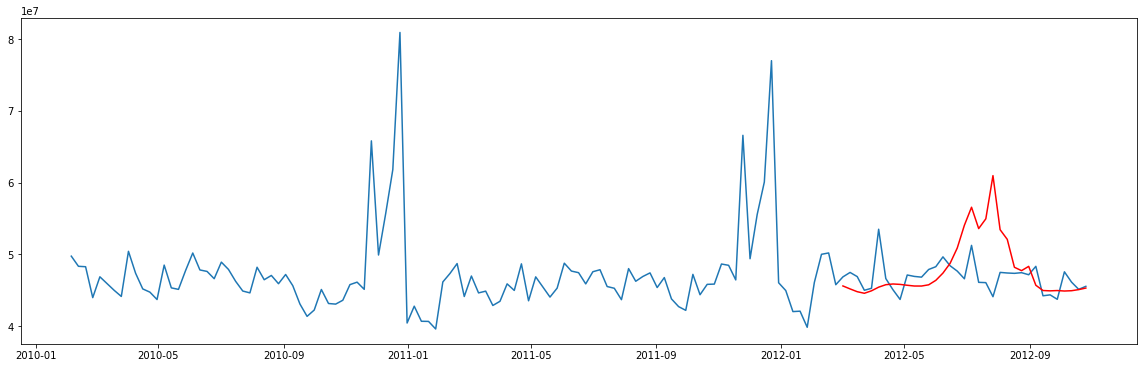

In [95]:
plt.figure(figsize=(20,6))
plt.plot(datas1_test.index,datas1_test['sales_sum'])
plt.plot(datas1_test.index,datas1_test['Prediction'],color='r')


In [96]:
train2=datas1

scaler.fit(train2)
train2=scaler.transform(train2)

n_inputs=35
features=1

generator=TimeseriesGenerator(train2,train2,length=n_inputs,batch_size=6)
model2.fit_generator(generator, epochs=180)

predi=[]
batch=train2[-n_inputs:].reshape((1,n_inputs,n_features))

for i in range(n_inputs):
    predi.append(model2.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[predi[i]]],axis=1)


Epoch 1/180
18/18 [==============================] - 2s 84ms/step - loss: 0.0108
Epoch 2/180
18/18 [==============================] - 2s 86ms/step - loss: 0.0093
Epoch 3/180
18/18 [==============================] - 1s 70ms/step - loss: 0.0081
Epoch 4/180
18/18 [==============================] - 1s 71ms/step - loss: 0.0052
Epoch 5/180
18/18 [==============================] - 2s 84ms/step - loss: 0.0095
Epoch 6/180
18/18 [==============================] - 1s 78ms/step - loss: 0.0084
Epoch 7/180
18/18 [==============================] - 1s 71ms/step - loss: 0.0079
Epoch 8/180
18/18 [==============================] - 1s 71ms/step - loss: 0.0065
Epoch 9/180
18/18 [==============================] - 1s 82ms/step - loss: 0.0058
Epoch 10/180
18/18 [==============================] - 1s 76ms/step - loss: 0.0076
Epoch 11/180
18/18 [==============================] - 1s 70ms/step - loss: 0.0058
Epoch 12/180
18/18 [==============================] - 1s 70ms/step - loss: 0.0068
Epoch 13/180
18/18 [=====

In [97]:
from pandas.tseries.offsets import DateOffset
add_dates=[datas1.index[-1] + DateOffset(weeks=x) for x in range(0,36)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=datas1.columns)

In [98]:
future_dates.tail()

,sales_sum
2013-05-31,NaN
2013-06-07,NaN
2013-06-14,NaN
2013-06-21,NaN
2013-06-28,NaN


In [99]:
datas1_predict=pd.DataFrame(scaler.inverse_transform(predi),index=future_dates[-n_inputs:].index,columns=['Prediction'])

datas1_forec=pd.concat([datas1,datas1_predict],axis=1)

In [100]:
datas1_forec.tail(37)

,sales_sum,Prediction
2012-10-19,45122410.57,NaN
2012-10-26,45544116.29,NaN
2012-11-02,NaN,4.818647e+07
2012-11-09,NaN,4.878347e+07
2012-11-16,NaN,5.039561e+07
2012-11-23,NaN,5.259114e+07
2012-11-30,NaN,5.455988e+07
2012-12-07,NaN,5.818282e+07
2012-12-14,NaN,5.836781e+07
2012-12-21,NaN,6.280247e+07


No handles with labels found to put in legend.


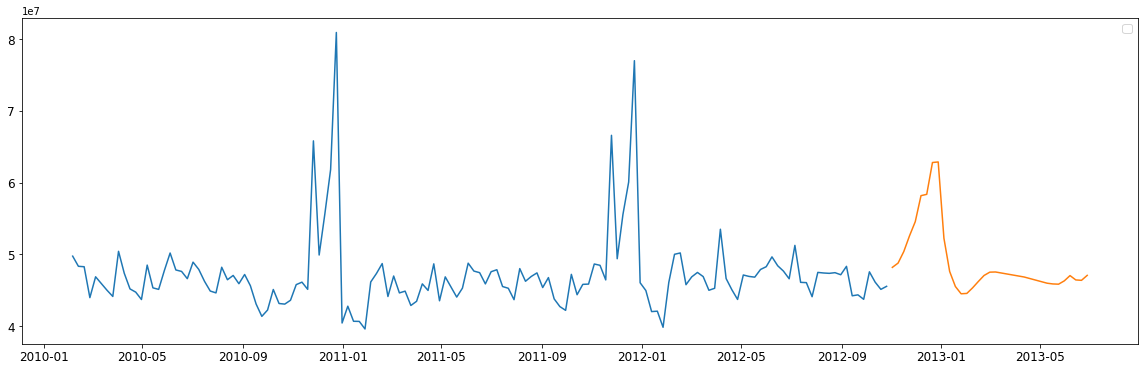

In [101]:
plt.figure(figsize=(20,6))
plt.plot(datas1_forec.index,datas1_forec['sales_sum'])
plt.plot(datas1_forec.index,datas1_forec['Prediction'])
plt.legend(loc='best',fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### with exog 

In [102]:
Data_t1=pd.merge(data_sales,exog2,on=['Date'],how='right')
Data_t1.head(3)

,Date,sales_sum,T_mean,cpi_mean
0,2010-02-05,49750740.50,34.037333,167.730885
1,2010-02-12,48336677.63,34.151333,167.825608
2,2010-02-19,48276993.78,37.719778,167.871686


In [103]:
Data_t1.Date=pd.to_datetime(Data_t1.Date)
Data_t1=Data_t1.set_index('Date')

In [104]:
Data_t1.head(3)

,sales_sum,T_mean,cpi_mean
Date,,,
2010-02-05,49750740.50,34.037333,167.730885
2010-02-12,48336677.63,34.151333,167.825608
2010-02-19,48276993.78,37.719778,167.871686


In [105]:
train3,test3=Data_t1[:108],Data_t1[108:]

In [106]:
trainX=train3.iloc[:,1:3]
trainX.head(2)

,T_mean,cpi_mean
Date,,
2010-02-05,34.037333,167.730885
2010-02-12,34.151333,167.825608


In [107]:
testX=test3.iloc[:,1:3]
testX.head(2)

,T_mean,cpi_mean
Date,,
2012-03-02,45.486444,174.921137
2012-03-09,47.550889,175.052178


In [108]:
trainy=train3.iloc[:,0:1]
trainy.head(2)

,sales_sum
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63


In [109]:
testy=test3.iloc[:,0:1]
testy.head(2)

,sales_sum
Date,
2012-03-02,46861034.97
2012-03-09,47480454.11


In [110]:
train3.tail()

,sales_sum,T_mean,cpi_mean
Date,,,
2012-01-27,39834974.67,42.726000,174.395727
2012-02-03,46085608.09,44.804444,174.473324
2012-02-10,50009407.92,39.848000,174.550920
2012-02-17,50197056.96,40.203333,174.659056
2012-02-24,45771506.57,45.124000,174.790097


In [111]:
test3.tail()

,sales_sum,T_mean,cpi_mean
Date,,,
2012-09-28,43734899.40,68.754444,176.373588
2012-10-05,47566639.31,65.973111,176.505052
2012-10-12,46128514.25,58.342667,176.636515
2012-10-19,45122410.57,60.705333,176.652613
2012-10-26,45544116.29,61.051111,176.649482


In [112]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(trainX)
scaler.fit(trainy)
trainX=scaler.transform(trainX)
trainy=scaler.transform(trainy)
testX=scaler.transform(testX)
testy=scaler.transform(testy)

In [113]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [114]:
n_inputs=10
n_features=2
train_generator=TimeseriesGenerator(trainX,trainy,length=n_inputs,batch_size=6)
test_generator=TimeseriesGenerator(testX,testy,length=n_inputs,batch_size=6)
# design network
model5 = Sequential()
model5.add(LSTM(50,activation='relu', input_shape=(n_inputs,n_features)))
model5.add(Dropout(0.2))
model5.add(Dense(2))
model5.compile(loss='mae', optimizer='adam')
# fit network
history = model5.fit(trainX, trainy, epochs=50, batch_size=6, validation_data=(testX, testy), verbose=2, shuffle=False)
# plot history

ValueError: Error when checking input: expected lstm_3_input to have 3 dimensions, but got array with shape (108, 2)

In [ ]:
predi1=[]
batch=trainX[-n_inputs:].reshape((1,n_inputs,n_features))
batch1=trainy[-n_inputs:].reshape((1,n_inputs,n_features))


for i in range(n_inputs):
    predi1.append(model3.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[predi1[i]]],axis=1)

In [ ]:
D1_predict=pd.DataFrame(scaler.inverse_transform(predi1),Data_t1[-n_inputs:].index,columns=['Date','sales_sum','Prediction'])

exog_test=pd.concat([Data_t1,D1_predict['Prediction']],axis=1)

In [ ]:
exog_test.tail()

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(exog_test.index,exog_test['sales_sum'])
plt.plot(exog_test.index,exog_test['Prediction'],color='r')


# 4th try

In [ ]:
Data_t3=pd.merge(data_sales,exog2,on=['Date'],how='right')
Data_t3.head(3)

In [ ]:
Data_t3['sales_sum_lag1']=Data_t3[['sales_sum']].shift(1)
Data_t3.head(3)

In [ ]:
Data_t3.Date=pd.to_datetime(Data_t3.Date)
Data_t3=Data_t3.set_index('Date')

In [ ]:
Data_t3.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Data_t3=scaler.fit_transform(np.array(Data_t3))

In [ ]:
Data_t3

In [ ]:
train5,test5=Data_t3[:108],Data_t3[108:]

In [ ]:
train5.shape,test5.shape

In [ ]:
train_X2, train_y2 = train5[:, 1:3], train5[:,0:1]
test_X2, test_y2 = test5[:, 1:3], test5[:,0:1]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
test_X2 = test_X2.reshape((test_X2.shape[0], 1, test_X2.shape[1]))
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape)



In [ ]:
# design network
model5 = Sequential()
model5.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model5.add(Dense(1))
model5.compile(loss='mae', optimizer='adam')
# fit network
history = model5.fit(train_X2, train_y2, epochs=50, batch_size=72, validation_data=(test_X2, test_y2), verbose=2, shuffle=False)
# plot history

In [ ]:
# make a prediction
yhat = model5.predict(test_X2)
test_X2 = test_X2.reshape((test_X2.shape[0], test_X2.shape[2]))

In [ ]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X2), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)


In [ ]:
# invert scaling for actual
test_y2 = test_y2.reshape((len(test_y2), 1))
inv_y2 = np.concatenate((test_y2, test_X2), axis=1)
inv_y2 = scaler.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]

In [ ]:
plt.plot(yhat,color='r')
plt.plot(inv_yhat)
plt.plot(inv_y2)

In [115]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [116]:
Data_t3=pd.merge(data_sales,exog2,on=['Date'],how='right')
Data_t3.head(3)

,Date,sales_sum,T_mean,cpi_mean
0,2010-02-05,49750740.50,34.037333,167.730885
1,2010-02-12,48336677.63,34.151333,167.825608
2,2010-02-19,48276993.78,37.719778,167.871686


In [117]:
df=Data_t3.iloc[:,1:5]
df.head(3)

,sales_sum,T_mean,cpi_mean
0,49750740.50,34.037333,167.730885
1,48336677.63,34.151333,167.825608
2,48276993.78,37.719778,167.871686


In [118]:
values = df.values 
reframed = series_to_supervised(values, 1, 1)
print(reframed.head())

     var1(t-1)  var2(t-1)   var3(t-1)      var1(t)    var2(t)     var3(t)
1  49750740.50  34.037333  167.730885  48336677.63  34.151333  167.825608
2  48336677.63  34.151333  167.825608  48276993.78  37.719778  167.871686
3  48276993.78  37.719778  167.871686  43968571.13  39.243556  167.909657
4  43968571.13  39.243556  167.909657  46871470.30  42.917333  167.947628
5  46871470.30  42.917333  167.947628  45925396.51  47.432444  167.985598


In [119]:
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
reframed.head(2)

,var1(t-1),var2(t-1),var3(t-1),var1(t)
1,49750740.50,34.037333,167.730885,48336677.63
2,48336677.63,34.151333,167.825608,48276993.78


In [120]:
# normalize features
values = reframed.values 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.24559651, 0.06879594, 0.02025013, 0.21138385],
       [0.21138385, 0.07100116, 0.03065224, 0.20993982],
       [0.20993982, 0.14002923, 0.03571237, 0.10569932],
       [0.10569932, 0.16950522, 0.03988217, 0.17593376],
       [0.17593376, 0.24057086, 0.04405198, 0.1530439 ],
       [0.1530439 , 0.32791128, 0.04822179, 0.13038756],
       [0.13038756, 0.3766926 , 0.04216305, 0.10970086],
       [0.10970086, 0.34805055, 0.03439954, 0.26188166],
       [0.26188166, 0.43794867, 0.02663604, 0.18788154],
       [0.18788154, 0.5404677 , 0.01887254, 0.13509806],
       [0.13509806, 0.53273868, 0.01279974, 0.12422951],
       [0.12422951, 0.51471865, 0.00898122, 0.09932539],
       [0.09932539, 0.52951898, 0.00516269, 0.21541384],
       [0.21541384, 0.6508146 , 0.00134417, 0.13864047],
       [0.13864047, 0.58280961, 0.        , 0.13356028],
       [0.13356028, 0.69216352, 0.01350195, 0.19737094],
       [0.19737094, 0.77336113, 0.0270039 , 0.25618896],
       [0.25618896, 0.83043889,

In [121]:
scaled.shape

(142, 4)

In [122]:
# split into train and test sets
#values = scaled.values
#train = scaled
train = scaled[:110, :]
test = scaled[110:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
#print(train_X.shape, train_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(110, 1, 3) (110,) (32, 1, 3) (32,)


In [123]:
train_X

array([[[0.24559651, 0.06879594, 0.02025013]],

       [[0.21138385, 0.07100116, 0.03065224]],

       [[0.20993982, 0.14002923, 0.03571237]],

       [[0.10569932, 0.16950522, 0.03988217]],

       [[0.17593376, 0.24057086, 0.04405198]],

       [[0.1530439 , 0.32791128, 0.04822179]],

       [[0.13038756, 0.3766926 , 0.04216305]],

       [[0.10970086, 0.34805055, 0.03439954]],

       [[0.26188166, 0.43794867, 0.02663604]],

       [[0.18788154, 0.5404677 , 0.01887254]],

       [[0.13509806, 0.53273868, 0.01279974]],

       [[0.12422951, 0.51471865, 0.00898122]],

       [[0.09932539, 0.52951898, 0.00516269]],

       [[0.21541384, 0.6508146 , 0.00134417]],

       [[0.13864047, 0.58280961, 0.        ]],

       [[0.13356028, 0.69216352, 0.01350195]],

       [[0.19737094, 0.77336113, 0.0270039 ]],

       [[0.25618896, 0.83043889, 0.04050585]],

       [[0.19904144, 0.85223746, 0.05400781]],

       [[0.19409364, 0.83350385, 0.05522662]],

       [[0.16958428, 0.93445815, 0.05153

In [124]:
# design network
model5 = Sequential()
model5.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model5.fit(train_X, train_y, epochs=100, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 110 samples, validate on 32 samples
Epoch 1/100
 - 1s - loss: 0.0547 - val_loss: 0.0147
Epoch 2/100
 - 0s - loss: 0.0474 - val_loss: 0.0097
Epoch 3/100
 - 0s - loss: 0.0413 - val_loss: 0.0062
Epoch 4/100
 - 0s - loss: 0.0363 - val_loss: 0.0041
Epoch 5/100
 - 0s - loss: 0.0323 - val_loss: 0.0030
Epoch 6/100
 - 0s - loss: 0.0292 - val_loss: 0.0029
Epoch 7/100
 - 0s - loss: 0.0269 - val_loss: 0.0034
Epoch 8/100
 - 0s - loss: 0.0251 - val_loss: 0.0044
Epoch 9/100
 - 0s - loss: 0.0239 - val_loss: 0.0056
Epoch 10/100
 - 0s - loss: 0.0231 - val_loss: 0.0068
Epoch 11/100
 - 0s - loss: 0.0226 - val_loss: 0.0079
Epoch 12/100
 - 0s - loss: 0.0222 - val_loss: 0.0089
Epoch 13/100
 - 0s - loss: 0.0219 - val_loss: 0.0096
Epoch 14/100
 - 0s - loss: 0.0218 - val_loss: 0.0101
Epoch 15/100
 - 0s - loss: 0.0216 - val_loss: 0.0104
Epoch 16/100
 - 0s - loss: 0.0215 - val_loss: 0.0105
Epoch 17/100
 - 0s - loss: 0.0214 - val_loss: 0.0106
Epoch 18/100
 - 0s - loss: 0.0213 - val_loss: 0.0105
Epoch 19/1

In [129]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

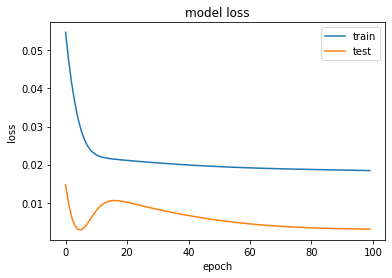

In [125]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [126]:
test_X.shape

(32, 1, 3)

In [127]:
from sklearn.metrics import mean_squared_error,r2_score

Test RMSE: 2288893.487


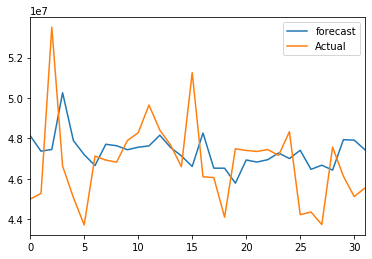

In [128]:
# make a prediction
yhat = model5.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 3))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -3:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Actual Vs Frorecast plot
dd=pd.DataFrame({'forecast':inv_yhat,'Actual':inv_y})
dd.plot()

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)